### Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
logins = pd.read_json("./logins.json")
logins['counts'] = 1
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null datetime64[ns]
counts        93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [3]:
logins_group = logins.groupby(pd.Grouper(key='login_time', freq='15min')).aggregate(np.sum).reset_index()
logins_group.head()

,login_time,counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


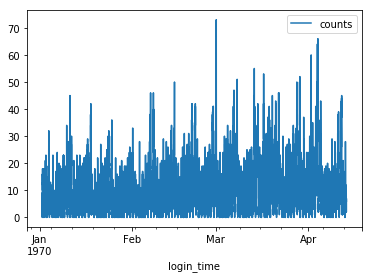

In [4]:
# the entire dataset
logins_group.plot.line(x='login_time', y='counts')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
login_time    103 non-null datetime64[ns]
counts        103 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


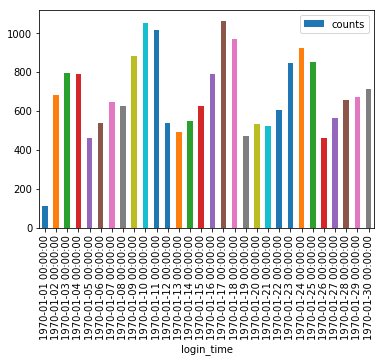

In [5]:
logins_group_day = logins.groupby(pd.Grouper(key='login_time', freq='d')).aggregate(np.sum).reset_index()
logins_group_day.info()
logins_group_day[:30].plot.bar(x='login_time', y='counts')

**Analysis**: Grouping the logins based on daily cycle demonstrates a patthen for everything 7 days(a week), where Mondays and Tuesday usually have the lowest number of logins(~500) and weekends have the largest numbre of logins(~1000). The logins keep increasing from Mondays to Sundays and drop back when next week cycle starts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
login_time    4 non-null datetime64[ns]
counts        4 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 144.0 bytes


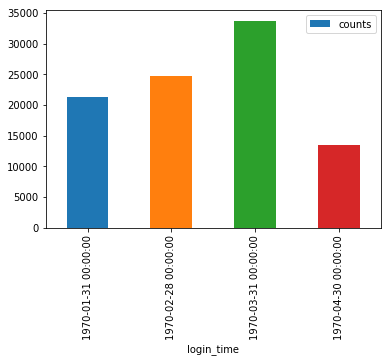

In [6]:
logins_group_month = logins.groupby(pd.Grouper(key='login_time', freq='M')).aggregate(np.sum).reset_index()
logins_group_month.info()
logins_group_month.plot.bar(x='login_time', y='counts')

**Analysis**: Grouping the logins based on monthly cycle demonstrates that amount of logins is largest in March, 1970 and smallest in April, 1970.

### Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**Analysis**

1. The key success matrix is the number of cars getting through the toll bridge per day per direction. The increase of this number implies the success of encouraging drvier pateners to be available in both cities by reimbursing all toll costs.

2. A practical experiment design: 
        2.1 Take two groups of drivers (500 drivers each group). We promise to one group of drivers to have all toll costs reimbursed by sending them reimbusement code to use after user registration. We randomly pick 500 drivers whose toll costs are not reimbursed.
        2.2 Track both groups of drivers in a 60-day period. We calculate the distribution of average number of drivers passing the toll daily for each group. 
        2.3 Perform a two-sample t-test and set significance levels equal to 0.05. The null hypothesis is that the reimbusement does not encourage the driver to be available in both cities.(μ1 - μ2 = 0). If the corrsponding p value is less than significuance level(0.05 in this case), we reject the null hypothesis and state that the reimbursment encourgaes drivers attendency of staying in both cities.

### Part 3 ‐ Predictive modeling


Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [7]:
import json
with open('./ultimate_data_challenge.json','r') as json_file:
    riders_dict = json.load(json_file)

In [8]:
riders_dict = pd.DataFrame(riders_dict)
riders_dict.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [9]:
riders_dict.sort_values('last_trip_date', ascending = False).head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
4486,11.94,5.0,5.0,1.0,Winterfell,2014-07-01,Android,2014-01-25,0.0,4,True,25.0


**Analysis**
- Sorting the 'last_trip_date' in a descending order reveals that this dataset is on pulled 2014-07-01
- If the last trip date is before 2014-06-01 then the user is not an active user

In [10]:
riders_dist = riders_dict.groupby('last_trip_date') \
                         .count() \
                         .sort_values('last_trip_date', ascending = False)[['trips_in_first_30_days']] \
                         .rename(columns={'trips_in_first_30_days':'counts'})
riders_dist.head()

,counts
last_trip_date,
2014-07-01,548
2014-06-30,1408
2014-06-29,2036
2014-06-28,1679
2014-06-27,1120


In [11]:
riders_dist = riders_dist.reset_index() 
riders_dist['last_trip_date'] = pd.to_datetime(riders_dist['last_trip_date'])

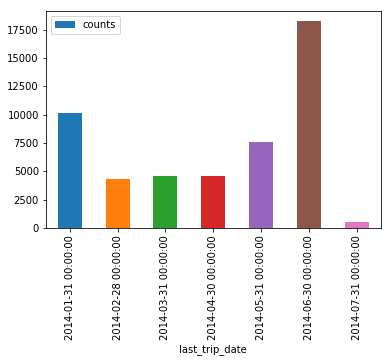

In [12]:
riders_dist_month = riders_dist.groupby(pd.Grouper(key='last_trip_date', freq='m')) \
                               .aggregate(np.sum)  \
                               .reset_index()
riders_dist_month.plot.bar(x='last_trip_date', y='counts')

In [13]:
riders_dist_month

,last_trip_date,counts
0,2014-01-31,10147
1,2014-02-28,4308
2,2014-03-31,4568
3,2014-04-30,4588
4,2014-05-31,7585
5,2014-06-30,18256
6,2014-07-31,548


In [14]:
retain_rate = (18256 + 548)/np.sum(riders_dist_month['counts']) * 100

print("fraction of the observed users were retained is {}%".format(round(retain_rate,2)))

fraction of the observed users were retained is 37.61%


**Analysis**
 
 fraction of the observed users were retained = 37.61%



In [15]:
# create a column named 'retained' to differentiate retained and non-retained users
# this column would be the target value
riders_dict['last_trip_date'] = pd.to_datetime(riders_dict['last_trip_date'])
riders_dict['signup_date'] = pd.to_datetime(riders_dict['signup_date'])
riders_dict['retained_period'] = (riders_dict['last_trip_date'] - riders_dict['signup_date'])

# riders_dict['retained_6th_month'] is the target
riders_dict['retained_6th_month'] = np.where(riders_dict['retained_period'] > pd.Timedelta(5,'M'),1,0)

riders_dict.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_period,retained_6th_month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,148 days,0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1 days,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1 days,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,11 days,0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,2 days,0


In [16]:
features = riders_dict.iloc[:,0:12].drop(['last_trip_date', 'signup_date'], axis=1)

# one-hot-encoding

features = pd.concat([features,pd.get_dummies(features['city'], prefix='city',dummy_na=True)],axis=1).drop(['city'],axis=1)
features = pd.concat([features,pd.get_dummies(features['phone'], prefix='phone',dummy_na=True)],axis=1).drop(['phone'],axis=1)
features = pd.concat([features,pd.get_dummies(features['ultimate_black_user'], prefix='ultimate_black_user',dummy_na=True)],axis=1).drop(['ultimate_black_user'],axis=1)

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
avg_dist                     50000 non-null float64
avg_rating_by_driver         49799 non-null float64
avg_rating_of_driver         41878 non-null float64
avg_surge                    50000 non-null float64
surge_pct                    50000 non-null float64
trips_in_first_30_days       50000 non-null int64
weekday_pct                  50000 non-null float64
city_Astapor                 50000 non-null uint8
city_King's Landing          50000 non-null uint8
city_Winterfell              50000 non-null uint8
city_nan                     50000 non-null uint8
phone_Android                50000 non-null uint8
phone_iPhone                 50000 non-null uint8
phone_nan                    50000 non-null uint8
ultimate_black_user_False    50000 non-null uint8
ultimate_black_user_True     50000 non-null uint8
ultimate_black_user_nan      50000 non-null uint8
dtypes: float64(6), int64(1),

In [17]:
# mark zero values as missing or NaN
features[['avg_rating_by_driver','avg_rating_of_driver']] = features[['avg_rating_by_driver','avg_rating_of_driver']] \
                                                            .replace(np.NaN, 0)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
avg_dist                     50000 non-null float64
avg_rating_by_driver         50000 non-null float64
avg_rating_of_driver         50000 non-null float64
avg_surge                    50000 non-null float64
surge_pct                    50000 non-null float64
trips_in_first_30_days       50000 non-null int64
weekday_pct                  50000 non-null float64
city_Astapor                 50000 non-null uint8
city_King's Landing          50000 non-null uint8
city_Winterfell              50000 non-null uint8
city_nan                     50000 non-null uint8
phone_Android                50000 non-null uint8
phone_iPhone                 50000 non-null uint8
phone_nan                    50000 non-null uint8
ultimate_black_user_False    50000 non-null uint8
ultimate_black_user_True     50000 non-null uint8
ultimate_black_user_nan      50000 non-null uint8
dtypes: float64(6), int64(1),

In [18]:
target = riders_dict['retained_6th_month']

/Users/mengzhao/miniconda2/envs/1_springboard_ds_track/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prediction accuracy is 0.78656


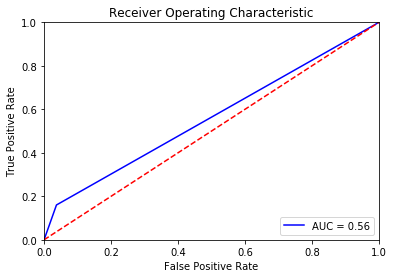

In [19]:
# built a logsitic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print("prediction accuracy is {}".format(score))

# plot ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# get feature importance

feature_names = list(features.columns)
feature_weights = list(logisticRegr.coef_[0])

feature_info = pd.DataFrame({
                             "feature_names":feature_names,
                             "feature_weights" :feature_weights
})

feature_info["abs_feature_weights"] = np.abs(feature_info["feature_weights"])
# sort pandas dataframe based on absolute feature weights
feature_info = feature_info.sort_values(by=['abs_feature_weights'],ascending=False)
feature_info

,feature_names,feature_weights,abs_feature_weights
7,city_Astapor,-0.820648,0.820648
11,phone_Android,-0.737890,0.737890
14,ultimate_black_user_False,-0.723757,0.723757
8,city_King's Landing,0.362591,0.362591
9,city_Winterfell,-0.296226,0.296226
13,phone_nan,-0.231090,0.231090
12,phone_iPhone,0.214698,0.214698
2,avg_rating_of_driver,0.145087,0.145087
5,trips_in_first_30_days,0.082429,0.082429
3,avg_surge,-0.058644,0.058644


**Analysis**

The classfication accuracy is 78.7% and the ROC curve indicates low overall accuracy of the test.
The most three important features are city_Astapor, phone_Android, ultimate_black_user_False
To improve its long term rider retention, we probably need to advertise more in the region of Astapor, improve the app's performance on Adroid platiform as well as encourage more pople to register as ultimate_black_users